# Conjuntos de Modelos: Introducción


## Preliminares

1. Importación de librerías


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

2. Función pasa visualizar los resultados de clasificación

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

## Ensembles of Estimators: Random Forests

El  **bagging** es una de las estrategias posibles para combinar múltiples modelos para reducir el efecto de sobreajuste. En este caso se hace uso de un conjunto de modelos paralelos, cada uno de los cuales se ajusta en exceso a los datos, y promedia los resultados para encontrar una mejor clasificación.
Un conjunto de árboles de decisión aleatorios se conoce como "Random Forests".

Este tipo de clasificación se puede utilizar mediante la clase ``BaggingClassifier`` de Scikit-Learn.:

1. Consideramos los siguientes datos de prueba

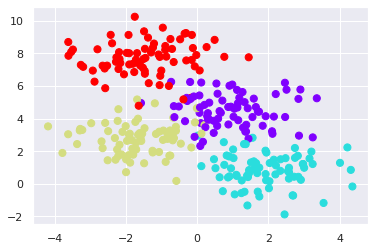

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

2. Construimos el clasificador, primero el individual y luego el agregado mediante *bagging**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


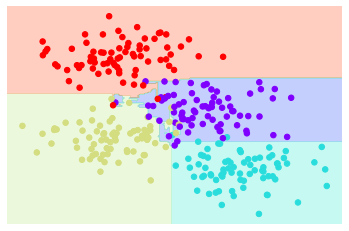

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

En este ejemplo, se han utilizado datos aleatorios entrenando cada estimador con un subconjunto aleatorio del 80% de los puntos de entrenamiento.

En la práctica, los árboles de decisión se aleatorizan más eficazmente inyectando cierta estocasticidad en la elección de las divisiones: de esta forma, todos los datos contribuyen al ajuste cada vez, pero los resultados del ajuste siguen teniendo la aleatoriedad deseada. Para realizar esta labor se utiliza la clase ``RandomForestClassifier``, que se encarga de toda la aleatorización automáticamente. Todo lo que hay que hacer es seleccionar un número de estimadores, y se ajustará muy rápidamente (en paralelo, si se desea) el conjunto de árboles:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


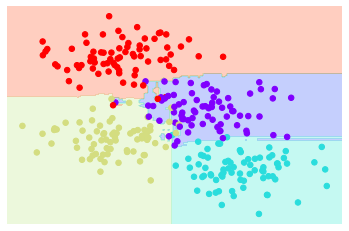

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

Al promediar 100 modelos de este tipo se cuenta con un modelo general que se acerca mucho más a la generalización sobre cómo debería dividirse el espacio.